In [181]:
#### Importing necessary libraries:-
import pandas as  pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso,LassoCV,Ridge,RidgeCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
import pickle




In [2]:
## Loading both train and test csv file:
bigdatamart_train = pd.read_csv(r"C:/Users/swati/Downloads/bigdatamart_rep-master/bigdatamart_rep-master/bigdatamart_Train.csv")
bigdatamart_test  = pd.read_csv(r"C:/Users/swati/Downloads/bigdatamart_rep-master/bigdatamart_rep-master/bigdatamart_Test.csv")

In [3]:
###Train data:-
bigdatamart_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
###Test data:-
bigdatamart_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [5]:
### Checking size of Train data:-
bigdatamart_train.shape

(8523, 12)

There are 8523 rows and 12 columns in Train data.

In [6]:
### Checking size of Test data:-
bigdatamart_test.shape

(5681, 11)

There are 5681 rows and 11 columns in Test data.Target column Item_Outlet_Sales is not present in test data,so I'll give
my model for training and prediction only Train data,beacuse In Test data,Target column is not present,so I'll not be able to compare my model's predicted value with actual one.Rest all steps  will be done for both Train and Test data.

In [7]:
### Checking more info about Train data:
bigdatamart_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


**So above,we can see Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,
these 7 columns are Categorical .
Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,these 5 columns are Numerical.
** All columns have 8523 count, except Item_Weight and Outlet_Size,So will check for missing values.


In [8]:
### Checking more info about Train data:
bigdatamart_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


**So here also,we can see Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,
these 7 columns are Categorical .
Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year these 4 columns are Numerical.
** All columns have 5681 count, except Item_Weight and Outlet_Size,So will check for missing values.


In [9]:
### Checking for missing values in Train data:-
bigdatamart_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

So here ,we can see Item_Weight has 1463 missing values and Outlet_Size has 2410 missing values. 

In [10]:
### Checking for missing values in Test data:-
bigdatamart_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [ ]:
So here ,we can see Item_Weight has 976 missing values and Outlet_Size has 1606 missing values. 

<AxesSubplot:xlabel='Item_Weight'>

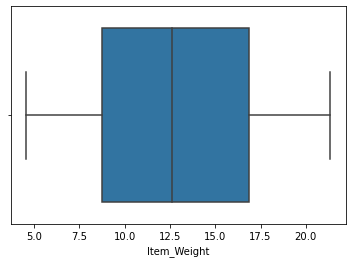

In [11]:
### Filling missing values,Since if data has outliers we can not apply mean,so first check outliers
### using boxplot in column Item_Weight:-
sns.boxplot(bigdatamart_train['Item_Weight'])


As we can see there are no outliers present in Item_Weight,so we can apply mean to fill missing values.

In [12]:
bigdatamart_train['Item_Weight'].fillna(bigdatamart_train['Item_Weight'].mean(),inplace = True)


In [13]:
## Again we check for missing values:-
bigdatamart_train.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

As we can see, Now Item_Weight has 0 missing values. Same step for Test Data.

<AxesSubplot:xlabel='Item_Weight'>

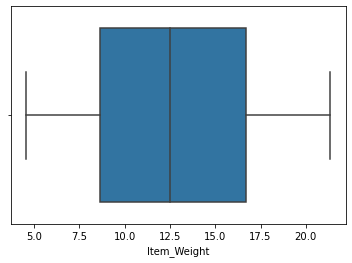

In [14]:
### Filling missing values,Since if data has outliers we can not apply mean,so first check outliers
### using boxplot in column Item_Weight:-
sns.boxplot(bigdatamart_test['Item_Weight'])


Here also ,not any outliers are present.So applying mean method to fill missing values.

In [15]:
bigdatamart_test['Item_Weight'].fillna(bigdatamart_test['Item_Weight'].mean(),inplace = True)


In [16]:
## Again we check for missing values:-
bigdatamart_test.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

Here also Item_Weight has 0 null values.

In [17]:
## Now fill missing values for Outlet_Size,Since it is a categorical column,so will apply mode to fill missing values.
## First check value_counts
bigdatamart_train['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

So we can see Medium has maximum counts,so we fill missing values with Medium both in Train and Test data.

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

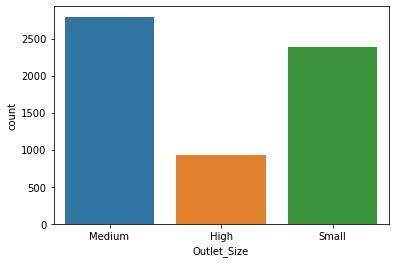

In [18]:
### Visualizing through graph:-
sns.countplot(bigdatamart_train['Outlet_Size'])

In [19]:
## Filling with mode:
bigdatamart_train['Outlet_Size'].fillna(bigdatamart_train['Outlet_Size'].mode()[0],inplace = True)

In [20]:
## Again we check for missing values:-
bigdatamart_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

So we can see now, no column has missing values.

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

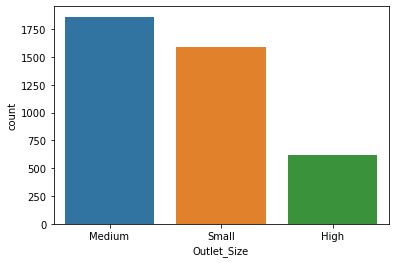

In [21]:
### Visualizing through graph for Test data:-
sns.countplot(bigdatamart_test['Outlet_Size'])

In [22]:
## Filling with mode:
bigdatamart_test['Outlet_Size'].fillna(bigdatamart_test['Outlet_Size'].mode()[0],inplace = True)

In [23]:
## Again we check for missing values:-
bigdatamart_test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

Now  also in Test data,no column has missing value.

In [24]:
## Checking more information about Train and Test data
bigdatamart_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


As we can see Item_Visibility minimum value is zero,It is not possible,so will fill this also.First check how many rows have 
0 values.

In [25]:
sum(bigdatamart_train['Item_Visibility'] == 0)

526

As we can see 526 rows have 0 value in Item_Visibility column,so fill it with mean .

In [26]:
## Replacing zero with mean:-
bigdatamart_train.loc[:,'Item_Visibility'].replace([0],[bigdatamart_train['Item_Visibility'].mean()],inplace = True)

In [27]:
### Checking again:-
sum(bigdatamart_train['Item_Visibility'] == 0)

0

In [28]:
bigdatamart_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.070213,140.992782,1997.831867,2181.288914
std,4.226124,0.048742,62.275067,8.371760,1706.499616
min,4.555000,0.003575,31.290000,1985.000000,33.290000
25%,9.310000,0.033085,93.826500,1987.000000,834.247400
50%,12.857645,0.062517,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Now  we can see,min value for Item_Visibility is 0.003575 not zero.

In [29]:
## Same steps will be  repeated for Test data:-

bigdatamart_test.describe()    

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,5681.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.245189,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,9.195000,0.027047,94.412000,1987.000000
50%,12.695633,0.054154,141.415400,1999.000000
75%,15.850000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [30]:
sum(bigdatamart_test['Item_Visibility'] == 0)

353

As we can see 353 rows have 0 value in Item_Visibility column,so fill it with mean .

In [31]:
## Replacing zero with mean:-
bigdatamart_test.loc[:,'Item_Visibility'].replace([0],[bigdatamart_test['Item_Visibility'].mean()],inplace = True)

In [32]:
## Checking again:-
sum(bigdatamart_test['Item_Visibility'] == 0)

0

In [33]:
bigdatamart_test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,5681.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.069765,141.023273,1997.828903
std,4.245189,0.048394,61.809091,8.372256
min,4.555000,0.003591,31.990000,1985.000000
25%,9.195000,0.033208,94.412000,1987.000000
50%,12.695633,0.062137,141.415400,1999.000000
75%,15.850000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


Now  we can see,min value for Item_Visibility is 0.003591 not zero.

In [34]:
bigdatamart_train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

# Feature Selection:-

From the analysis of data,I feel that Item_Identifier and Outlet_Identifier has not any impact on Target column means for sales 
of any product ,it's unique id does not play any role,same for Outlet identifier.So will drop these two columns. 

In [35]:
bigdatamart_train.drop(columns = ['Item_Identifier','Outlet_Identifier'],inplace = True)

In [36]:
bigdatamart_train.shape

(8523, 10)

Now we can see instead of 12,we have 10 columns.

In [37]:
bigdatamart_test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

So here also,will delete Item_Identifier and Outlet_Identifier.

In [38]:
bigdatamart_test.drop(columns = ['Item_Identifier','Outlet_Identifier'],inplace = True)

In [39]:
bigdatamart_test.shape

(5681, 9)

Now we can see instead of 11,we have 9 columns.

In [40]:
### Now Separating data into categorical and numerical columns:-
df_cat = bigdatamart_train[['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type']].copy()
df_cat

,Item_Fat_Content,Item_Type,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,Low Fat,Dairy,Medium,Tier 1,Supermarket Type1
1,Regular,Soft Drinks,Medium,Tier 3,Supermarket Type2
2,Low Fat,Meat,Medium,Tier 1,Supermarket Type1
3,Regular,Fruits and Vegetables,Medium,Tier 3,Grocery Store
4,Low Fat,Household,High,Tier 3,Supermarket Type1
...,...,...,...,...,...
8518,Low Fat,Snack Foods,High,Tier 3,Supermarket Type1
8519,Regular,Baking Goods,Medium,Tier 2,Supermarket Type1
8520,Low Fat,Health and Hygiene,Small,Tier 2,Supermarket Type1
8521,Regular,Snack Foods,Medium,Tier 3,Supermarket Type2


In [41]:
df_cat.describe()

,Item_Fat_Content,Item_Type,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,8523
unique,5,16,3,3,4
top,Low Fat,Fruits and Vegetables,Medium,Tier 3,Supermarket Type1
freq,5089,1232,5203,3350,5577


As from above table we can see unique values for following columns are:
Item_Fat_Content = 5
Item_Type   =16
Outlet_Size = 3
Outlet_Location_Type =3
Outlet_Type =3


In [54]:
### Printing value counts for all categorical column:
for col in df_cat:
    
    print(col)
    print(df_cat[col].value_counts())
    print("\n")

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


Outlet_Size
Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64


Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64


Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: 

In [43]:
df_cat['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

As we can see There are five unique values for Low fat and Regular type ,so will replace LF and low fat in Low Fat and Reg into
Regular

In [45]:
#### Merging into only two categories:-
bigdatamart_train['Item_Fat_Content']=bigdatamart_train['Item_Fat_Content'].replace({'LF': 'Low Fat','low fat':'Low Fat','reg':'Regular'})
bigdatamart_train['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

So here ,we can see now we have only two category Low Fat and Regular.

In [47]:
bigdatamart_test['Item_Fat_Content'].value_counts()

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

In [48]:
#### Merging into only two categories:-
bigdatamart_test['Item_Fat_Content']=bigdatamart_test['Item_Fat_Content'].replace({'LF': 'Low Fat','low fat':'Low Fat','reg':'Regular'})
bigdatamart_test['Item_Fat_Content'].value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

So in Test data,we have only two category Low Fat and Regular.

In [50]:
bigdatamart_train['Outlet_Establishment_Year']

0       1999
1       2009
2       1999
3       1998
4       1987
        ... 
8518    1987
8519    2002
8520    2004
8521    2009
8522    1997
Name: Outlet_Establishment_Year, Length: 8523, dtype: int64

As we can see in Outlet_Establishment_Year,we have year as value,As per my analysis,If any shop or outlet store is old,then sale at that store will be more due to customer's trust.So making it more meaningful column,I substract all the years from 2013.

In [55]:
bigdatamart_train['years_old'] = 2013 - bigdatamart_train['Outlet_Establishment_Year']

In [56]:
bigdatamart_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,years_old
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380,14
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228,4
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700,14
3,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800,15
4,8.93,Low Fat,0.066132,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052,26


In [57]:
bigdatamart_test['years_old'] = 2013 - bigdatamart_test['Outlet_Establishment_Year']

In [58]:
bigdatamart_test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,years_old
0,20.750000,Low Fat,0.007565,Snack Foods,107.8622,1999,Medium,Tier 1,Supermarket Type1,14
1,8.300000,Regular,0.038428,Dairy,87.3198,2007,Medium,Tier 2,Supermarket Type1,6
2,14.600000,Low Fat,0.099575,Others,241.7538,1998,Medium,Tier 3,Grocery Store,15
3,7.315000,Low Fat,0.015388,Snack Foods,155.0340,2007,Medium,Tier 2,Supermarket Type1,6
4,12.695633,Regular,0.118599,Dairy,234.2300,1985,Medium,Tier 3,Supermarket Type3,28


# EDA for Train data:-

<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

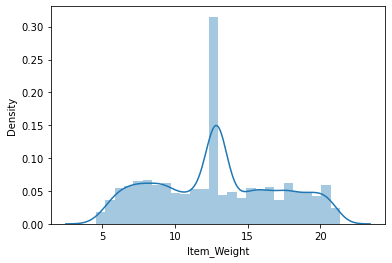

In [64]:
### Visualization Through Graph:-
### Visualizing through graph for Numerical columns:-
sns.distplot(bigdatamart_train['Item_Weight'])

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

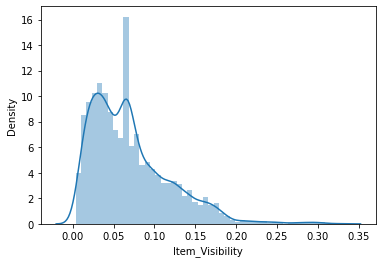

In [65]:
sns.distplot(bigdatamart_train['Item_Visibility'])

<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

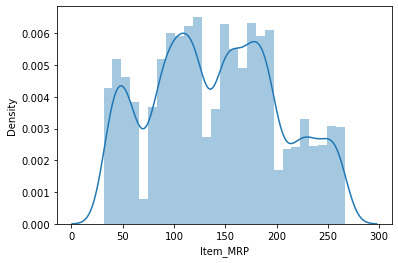

In [66]:
sns.distplot(bigdatamart_train['Item_MRP'])

<AxesSubplot:xlabel='years_old', ylabel='Density'>

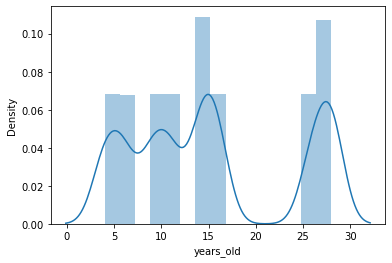

In [67]:
sns.distplot(bigdatamart_train['years_old'])

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

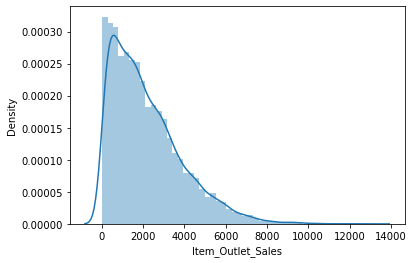

In [68]:
sns.distplot(bigdatamart_train['Item_Outlet_Sales'])

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

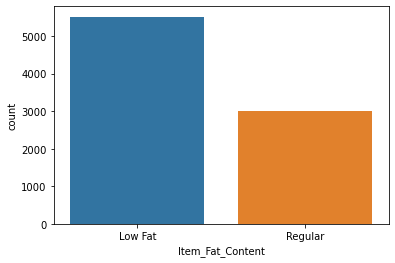

In [69]:
 ## Visualization for Categorical columns:-
sns.countplot(bigdatamart_train['Item_Fat_Content'])    

[Text(0, 0, 'Dairy'),
 Text(1, 0, 'Soft Drinks'),
 Text(2, 0, 'Meat'),
 Text(3, 0, 'Fruits and Vegetables'),
 Text(4, 0, 'Household'),
 Text(5, 0, 'Baking Goods'),
 Text(6, 0, 'Snack Foods'),
 Text(7, 0, 'Frozen Foods'),
 Text(8, 0, 'Breakfast'),
 Text(9, 0, 'Health and Hygiene'),
 Text(10, 0, 'Hard Drinks'),
 Text(11, 0, 'Canned'),
 Text(12, 0, 'Breads'),
 Text(13, 0, 'Starchy Foods'),
 Text(14, 0, 'Others'),
 Text(15, 0, 'Seafood')]

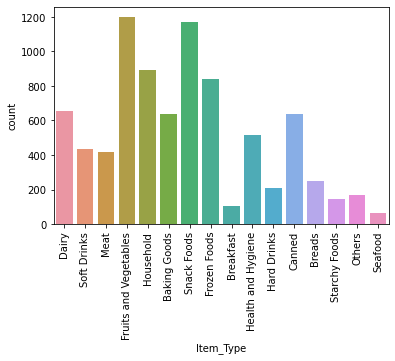

In [114]:
#plt.figure(figsize = (20,20))
label = list(bigdatamart_train['Item_Type'].unique())
graph = sns.countplot(bigdatamart_train['Item_Type'])    
graph.set_xticklabels(labels =label,rotation = 90 )

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

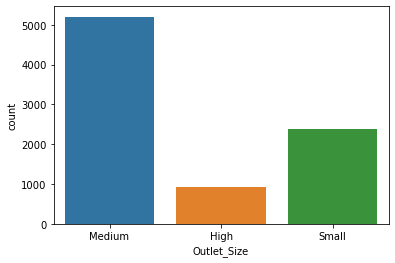

In [72]:
sns.countplot(bigdatamart_train['Outlet_Size'])    

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

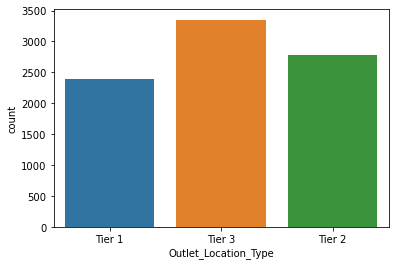

In [73]:
sns.countplot(bigdatamart_train['Outlet_Location_Type'])    

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

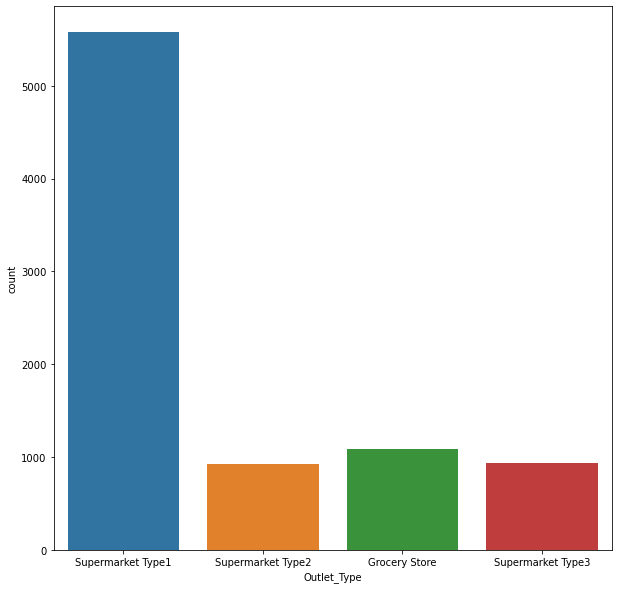

In [75]:
plt.figure(figsize=(10,10))
sns.countplot(bigdatamart_train['Outlet_Type'])    

In [81]:
### Checking skewness:-
bigdatamart_train.skew()

Item_Weight                  0.090561
Item_Visibility              1.286877
Item_MRP                     0.127202
Outlet_Establishment_Year   -0.396641
Item_Outlet_Sales            1.177531
years_old                    0.396641
dtype: float64

As all the values are in +/- 3 ,so I consider values are normally distributed.

<AxesSubplot:xlabel='Item_Weight'>

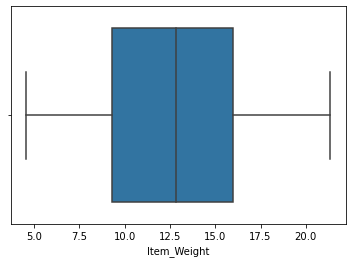

In [82]:
sns.boxplot(bigdatamart_train['Item_Weight'])

<AxesSubplot:xlabel='Item_Visibility'>

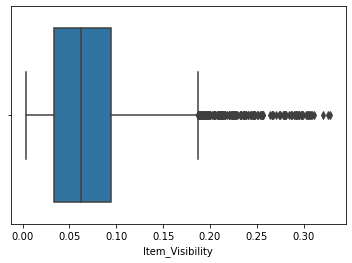

In [83]:
sns.boxplot(bigdatamart_train['Item_Visibility'])

<AxesSubplot:xlabel='Item_MRP'>

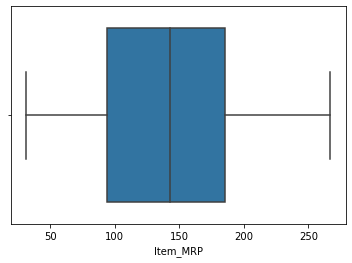

In [84]:
sns.boxplot(bigdatamart_train['Item_MRP'])

<AxesSubplot:xlabel='years_old'>

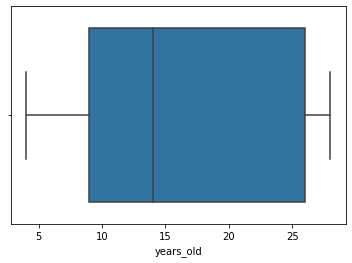

In [86]:
sns.boxplot(bigdatamart_train['years_old'])

<AxesSubplot:xlabel='Item_Outlet_Sales'>

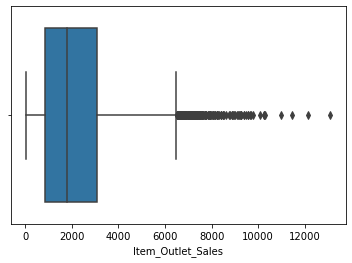

In [87]:
sns.boxplot(bigdatamart_train['Item_Outlet_Sales'])

Since Item_Visibility and Item_Outlet_Sales are showing some outliers.So applying Z score on these colums

In [88]:
## Removing outliers using zscore:-
from scipy.stats import zscore
z_score = zscore(bigdatamart_train[['Item_Visibility','Item_Outlet_Sales']])
abs_zscore=np.abs(z_score)
new_data =( abs_zscore < 3).all(axis=1)
bigdatamart_train = bigdatamart_train[new_data]
bigdatamart_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,years_old
count,8334.000000,8334.000000,8334.000000,8334.000000,8334.000000,8334.000000
mean,12.859365,0.068035,140.078705,1998.000360,2135.222437,14.999640
std,4.253055,0.044305,61.919025,8.318318,1580.155550,8.318318
min,4.555000,0.003575,31.290000,1985.000000,33.290000,4.000000
25%,9.300000,0.032756,93.354100,1987.000000,853.389150,9.000000
50%,12.857645,0.061305,141.947000,1999.000000,1796.994200,14.000000
75%,16.100000,0.093275,184.752250,2004.000000,3075.996000,26.000000
max,21.350000,0.216323,266.888400,2009.000000,7298.499600,28.000000


<AxesSubplot:xlabel='Item_Visibility'>

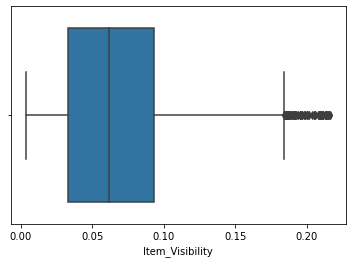

In [89]:
sns.boxplot(bigdatamart_train['Item_Visibility'])

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

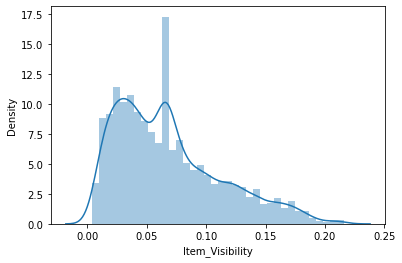

In [90]:
sns.distplot(bigdatamart_train['Item_Visibility'])

<AxesSubplot:xlabel='Item_Outlet_Sales'>

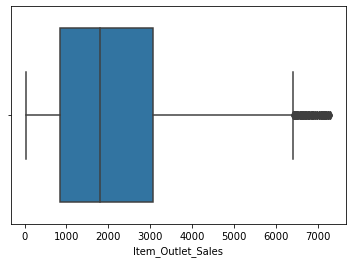

In [91]:
sns.boxplot(bigdatamart_train['Item_Outlet_Sales'])

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

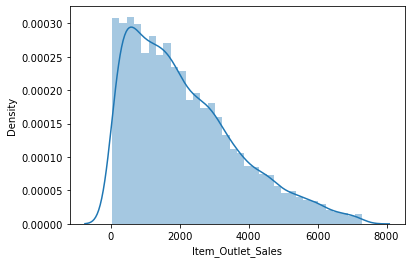

In [92]:
sns.distplot(bigdatamart_train['Item_Outlet_Sales'])

So we can see for both  Item_Outlet_Sales and Item_Visibility columns ,data are almost normally distributed.

In [ ]:
## Removing outliers using zscore:-
from scipy.stats import zscore
z_score = zscore(bigdatamart_train[['Item_Visibility','Item_Outlet_Sales']])
abs_zscore=np.abs(z_score)
new_data =( abs_zscore < 3).all(axis=1)
bigdatamart_train = bigdatamart_train[new_data]
bigdatamart_train.describe()

In [93]:
bigdatamart_train.shape

(8334, 11)

In [96]:
### Percentage loss of data:-
data_loss =(( 8523-8334)/8523)*100
data_loss

2.2175290390707496

# EDA for Test data

<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

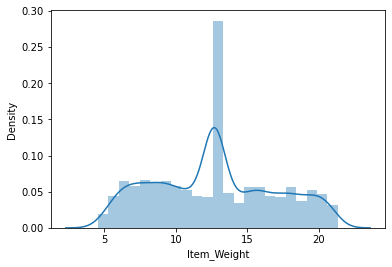

In [105]:
### Visualization Through Graph:-
### Visualizing through graph for Numerical columns:-
sns.distplot(bigdatamart_test['Item_Weight'])

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

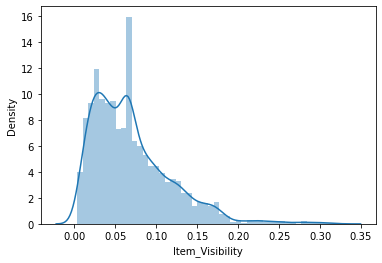

In [106]:
sns.distplot(bigdatamart_test['Item_Visibility'])

<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

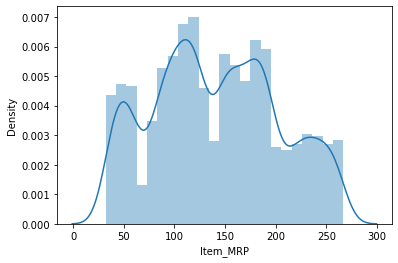

In [107]:
sns.distplot(bigdatamart_test['Item_MRP'])

<AxesSubplot:xlabel='years_old', ylabel='Density'>

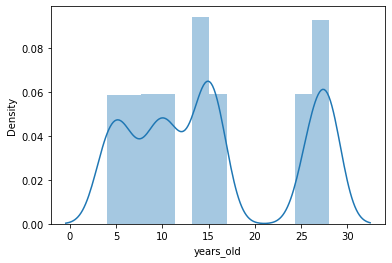

In [108]:
sns.distplot(bigdatamart_test['years_old'])

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

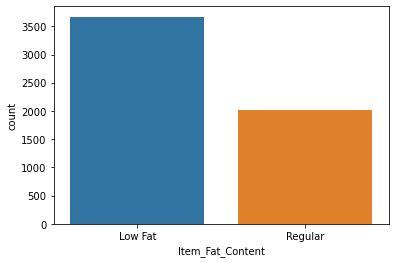

In [109]:
### Visualization for Categorical column:-
sns.countplot(bigdatamart_test['Item_Fat_Content'])    

[Text(0, 0, 'Snack Foods'),
 Text(1, 0, 'Dairy'),
 Text(2, 0, 'Others'),
 Text(3, 0, 'Fruits and Vegetables'),
 Text(4, 0, 'Baking Goods'),
 Text(5, 0, 'Health and Hygiene'),
 Text(6, 0, 'Breads'),
 Text(7, 0, 'Hard Drinks'),
 Text(8, 0, 'Seafood'),
 Text(9, 0, 'Soft Drinks'),
 Text(10, 0, 'Household'),
 Text(11, 0, 'Frozen Foods'),
 Text(12, 0, 'Meat'),
 Text(13, 0, 'Canned'),
 Text(14, 0, 'Starchy Foods'),
 Text(15, 0, 'Breakfast')]

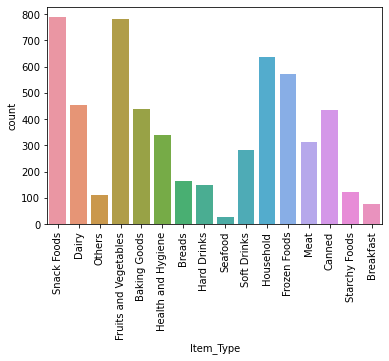

In [115]:
label = list(bigdatamart_test['Item_Type'].unique())
graph = sns.countplot(bigdatamart_test['Item_Type'])    
graph.set_xticklabels(labels =label,rotation = 90 )

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

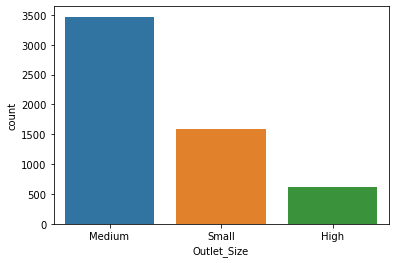

In [116]:
sns.countplot(bigdatamart_test['Outlet_Size'])    

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

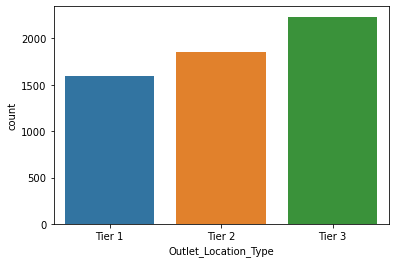

In [117]:
sns.countplot(bigdatamart_test['Outlet_Location_Type'])    

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

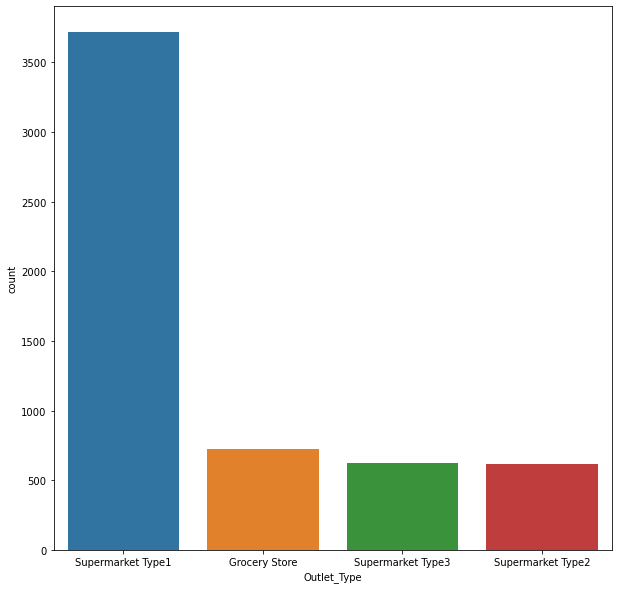

In [119]:
plt.figure(figsize = (10,10))
sns.countplot(bigdatamart_test['Outlet_Type'])    

In [120]:
### Checking skewness in Test data:
bigdatamart_test.skew()

Item_Weight                  0.142813
Item_Visibility              1.372659
Item_MRP                     0.136182
Outlet_Establishment_Year   -0.396306
years_old                    0.396306
dtype: float64

In [ ]:
All values are in range +/- 1,so will not do anything for skewness.

<AxesSubplot:xlabel='Item_Weight'>

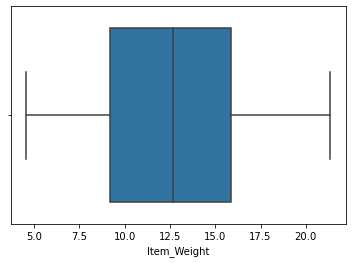

In [121]:
### Checking outliers in Test Data:-
sns.boxplot(bigdatamart_test['Item_Weight'])

<AxesSubplot:xlabel='Item_Visibility'>

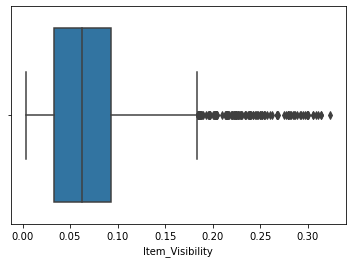

In [122]:
sns.boxplot(bigdatamart_test['Item_Visibility'])

<AxesSubplot:xlabel='Item_MRP'>

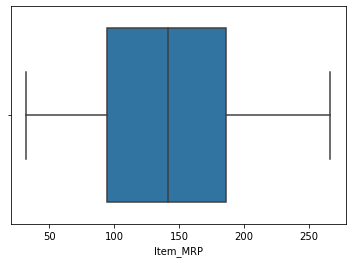

In [123]:
sns.boxplot(bigdatamart_test['Item_MRP'])

<AxesSubplot:xlabel='years_old'>

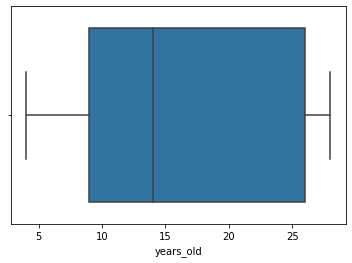

In [126]:
sns.boxplot(bigdatamart_test['years_old'])

In [129]:
#So outliers only in Item_Visibilty column,So will remove using Z score:-
from scipy.stats import zscore
z_score = zscore(bigdatamart_test[['Item_Visibility']])
abs_zscore=np.abs(z_score)
new_data =( abs_zscore < 3).all(axis=1)
bigdatamart_test = bigdatamart_test[new_data]
bigdatamart_test.shape

(5595, 10)

In [131]:
## Percentage loss:-
loss_data =( (5681-5595)/5681)*100
loss_data

1.51381798979053

# Correlation 

<AxesSubplot:>

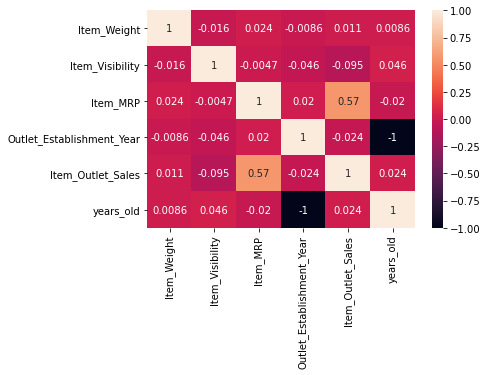

In [133]:
sns.heatmap(bigdatamart_train.corr(),annot=True)

So ,here we can see,Only Item_MRP has good correlation with Target column,No columns are very much correlated with each others,
and Target variables too.

<AxesSubplot:>

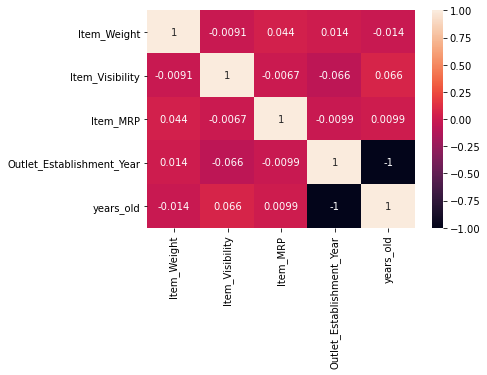

In [134]:
sns.heatmap(bigdatamart_test.corr(),annot=True)

# Label Encoding for Categorical Columns in Train Data:-

In [135]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cat_col = ['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type']
for col in cat_col:
    bigdatamart_train[col] = le.fit_transform(bigdatamart_train[col])
    

In [136]:
bigdatamart_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,years_old
0,9.30,0,0.016047,4,249.8092,1999,1,0,1,3735.1380,14
1,5.92,1,0.019278,14,48.2692,2009,1,2,2,443.4228,4
2,17.50,0,0.016760,10,141.6180,1999,1,0,1,2097.2700,14
3,19.20,1,0.066132,6,182.0950,1998,1,2,0,732.3800,15
4,8.93,0,0.066132,9,53.8614,1987,0,2,1,994.7052,26


# Label Encoding for Categorical Columns in Test Data:-

In [137]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cat_col = ['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type']
for col in cat_col:
    bigdatamart_test[col] = le.fit_transform(bigdatamart_test[col])


In [138]:
bigdatamart_test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,years_old
0,20.750000,0,0.007565,13,107.8622,1999,1,0,1,14
1,8.300000,1,0.038428,4,87.3198,2007,1,1,1,6
2,14.600000,0,0.099575,11,241.7538,1998,1,2,0,15
3,7.315000,0,0.015388,13,155.0340,2007,1,1,1,6
4,12.695633,1,0.118599,4,234.2300,1985,1,2,3,28


In [139]:
## Splitting data between features and columns:-
## Since Test data has not target column,so will do model training and testing only on Train data.
x = bigdatamart_train.drop('Item_Outlet_Sales',axis=1)

y = bigdatamart_train['Item_Outlet_Sales']
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8334, dtype: float64

In [140]:
x.shape

(8334, 10)

In [141]:
y.shape

(8334,)

In [142]:
### Since data is in very vast range,so applying Standardization:-
scaler = StandardScaler()
x_scaler = scaler.fit_transform(x)

In [145]:
x_scaler

array([[-0.83694643, -0.73691762, -1.17349423, ..., -1.37058866,
        -0.26066483, -0.12018055],
       [-1.63171704,  1.35700378, -1.10056467, ...,  1.09913802,
         1.02173228, -1.32241885],
       [ 1.09119527, -0.73691762, -1.1574052 , ..., -1.37058866,
        -0.26066483, -0.12018055],
       ...,
       [-0.53126543, -0.73691762, -0.74148146, ..., -0.13572532,
        -0.26066483, -0.7212997 ],
       [-1.32838743,  1.35700378,  1.74226005, ...,  1.09913802,
         1.02173228, -1.32241885],
       [ 0.45631935, -0.73691762, -0.52270942, ..., -1.37058866,
        -0.26066483,  0.12026711]])

# Train Test Split

In [146]:
## Finding best random state:-
from sklearn.metrics import r2_score

maxAcc = 0
maxrs =0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x_scaler,y,test_size =0.20,random_state =i)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    pred_test = lr.predict(x_test)
    score = r2_score(y_test,pred_test)
    
    if score >maxAcc:
        maxAcc=score
        maxrs=i
print("Best Accuracy is :",maxAcc,"at random state",maxrs)        

Best Accuracy is : 0.5301296693583328 at random state 142


# Linear Regression

In [156]:
x_train,x_test,y_train,y_test = train_test_split(x_scaler,y,test_size =0.20,random_state =142)
lr = LinearRegression()
lr.fit(x_train,y_train)
pred_test = lr.predict(x_test)
score = r2_score(y_test,pred_test)
print(score)


0.5301296693583328


# Decision Tree Regression

In [149]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred_test = dtr.predict(x_test)
score = r2_score(y_test,pred_test)

score


0.1907954419558252

# Ensemble 

In [150]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
pred_test = rf.predict(x_test)
score = r2_score(y_test,pred_test)

score


0.5698290920522262

#  KNeighborsRegressor


In [151]:
knr = KNeighborsRegressor()
knr.fit(x_train,y_train)
pred_test = knr.predict(x_test)
score = r2_score(y_test,pred_test)

score



0.5471066630990873

### Ridge Regression


In [157]:
rd = Ridge()
rd.fit(x_train,y_train)
predict_rd = rd.predict(x_test)

score = r2_score(y_test,predict_rd)
score

0.5309933270966998

# GradientBoosting Regressor:-


In [159]:
gbr = GradientBoostingRegressor()
gbr.fit(x_train,y_train)
predict_rd = gbr.predict(x_test)

score = r2_score(y_test,predict_rd)
score


0.6128218473460958

# AdaBoostRegressor

In [161]:
adb = AdaBoostRegressor()
adb.fit(x_train,y_train)
predict_rd = adb.predict(x_test)

score = r2_score(y_test,predict_rd)
score



0.5978994825295678

# Cross Validation Of Models:-

In [163]:
from sklearn.model_selection import cross_val_score
for i in range(2,10):
    cv_score = cross_val_score(lr,x_scaler,y,cv = i)
    cv_mean = cv_score.mean()
    print(f"At cross fold {i} the cv score is {cv_mean}")


At cross fold 2 the cv score is 0.49557283445117273
At cross fold 3 the cv score is 0.495037805735598
At cross fold 4 the cv score is 0.4939003711429387
At cross fold 5 the cv score is 0.4944330986239824
At cross fold 6 the cv score is 0.4951343954589804
At cross fold 7 the cv score is 0.49503001786536477
At cross fold 8 the cv score is 0.4943816348261816
At cross fold 9 the cv score is 0.49458953115631993


At crossfold 2,score is maximum,so will choose cv=2

In [164]:
cvs= cross_val_score(lr,x_scaler,y,cv=2)
print("Cross Validation of Linear Regression model ",cvs.mean())


Cross Validation of Linear Regression model  0.49557283445117273


In [165]:
cvs= cross_val_score(dtr,x_scaler,y,cv=2)
print("Cross Validation of Decision Tree Regression model ",cvs.mean())


Cross Validation of Decision Tree Regression model  0.14394640947116155


In [166]:
cvs= cross_val_score(rf,x_scaler,y,cv=2)
print("Cross Validation of RandomForest Regression model ",cvs.mean())


Cross Validation of RandomForest Regression model  0.5331672787771145


In [167]:
cvs= cross_val_score(knr,x_scaler,y,cv=2)
print("Cross Validation of KNeighbors Regression model ",cvs.mean())


Cross Validation of KNeighbors Regression model  0.485685477382318


In [168]:
cvs= cross_val_score(rd,x_scaler,y,cv=2)
print("Cross Validation of Ridge Regression model ",cvs.mean())


Cross Validation of Ridge Regression model  0.4955352075119376


In [169]:
cvs= cross_val_score(gbr,x_scaler,y,cv=2)
print("Cross Validation of GradientBoosting Regression model ",cvs.mean())


Cross Validation of GradientBoosting Regression model  0.5794657952520459


In [171]:
cvs= cross_val_score(adb,x_scaler,y,cv=2)
print("Cross Validation of AdaBoost Regression model ",cvs.mean())


Cross Validation of AdaBoost Regression model  0.5505047247239452


Cross validation score is higher for GradientBoosting Regression model,so will do hyperparameter tuning for that.

# HyperParameter Tuning for GradientBoosting Regression:-

In [178]:
params = {
          'criterion':['friedman_mse', 'squared_error', 'mse', 'mae'],
          'max_features':["auto","sqrt","log2"],
    
         }
gbr = GradientBoostingRegressor()
grid_search = GridSearchCV(gbr,params)
grid_search.fit(x_train,y_train)
print(grid_search.best_params_)


{'criterion': 'friedman_mse', 'max_features': 'sqrt'}


In [179]:
gbr = GradientBoostingRegressor(criterion='friedman_mse',max_features='sqrt')

gbr.fit(x_train,y_train)
predict_rd = gbr.predict(x_test)

score = r2_score(y_test,predict_rd)
score


0.6166931604702732

# Model Saving

In [182]:
filename = 'BigMartSales_prediction.pickle'
pickle.dump(gbr,open(filename,'wb'))


# Conclusion


In [183]:
## Conclusion : -
a =np.array(y_test)
predicted = np.array(gbr.predict(x_test))
df =  pd.DataFrame({ 'Original' : a,
                     'predicted' :predicted ,
                   },index = range(len(a))) 
df


,Original,predicted
0,1146.5076,2822.909042
1,1348.2450,1452.129082
2,222.3772,1849.850510
3,3395.5800,1865.277806
4,4753.8120,4885.401907
...,...,...
1662,623.1888,1343.628352
1663,3214.4824,3033.574467
1664,384.8324,597.965855
1665,150.4708,350.364855
